## Prophet을 활용한 실질 gdp 예측



In [ ]:
# prophet 설치
pip install prophet

In [ ]:
# 라이브러리 불러오기
import pandas as  pd
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime 

In [ ]:
# 데이터 불러오기
df = pd.read_excel("실질 GDP.xlsx")
df

,y,ds
0,7595.9,1960-06-30
1,6652.8,1960-09-30
2,8236.0,1960-12-31
3,7000.7,1961-03-31
4,8141.3,1961-06-30
...,...,...
244,478264.5,2021-06-30
245,478189.5,2021-09-30
246,505571.7,2021-12-31
247,467351.1,2022-03-31


In [ ]:
# 날짜 datetime으로 타입 변경
df1 = df
df1['ds'] = pd.to_datetime(df1['ds'], format="%Y-%m-%d")
df1

,y,ds
0,7595.9,1960-06-30
1,6652.8,1960-09-30
2,8236.0,1960-12-31
3,7000.7,1961-03-31
4,8141.3,1961-06-30
...,...,...
244,478264.5,2021-06-30
245,478189.5,2021-09-30
246,505571.7,2021-12-31
247,467351.1,2022-03-31


In [ ]:
# 모델 튜닝(주기성(년도), 휴일(한국) 고려 )
m = Prophet(yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False)
m.add_country_holidays(country_name='KR')
m.fit(df1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpeoova5pa/h1nljb1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeoova5pa/yvdlbuln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62513', 'data', 'file=/tmp/tmpeoova5pa/h1nljb1q.json', 'init=/tmp/tmpeoova5pa/yvdlbuln.json', 'output', 'file=/tmp/tmp3_34o3jg/prophet_model-20220915121813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 분기 별(3개월) 예측
future = m.make_future_dataframe(periods=6, freq='3M')
future.tail()

,ds
250,2022-12-31
251,2023-03-31
252,2023-06-30
253,2023-09-30
254,2023-12-31


In [ ]:
# 예측 결과
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
249,2022-09-30,496055.827156,489408.993289,503322.846673
250,2022-12-31,507410.444510,500172.999657,514358.111433
251,2023-03-31,492603.317788,485643.222411,499784.533619
252,2023-06-30,505142.741728,498030.235451,512801.531926
253,2023-09-30,506787.229285,499621.296179,513319.937788
254,2023-12-31,519952.839219,513089.854017,526754.364713


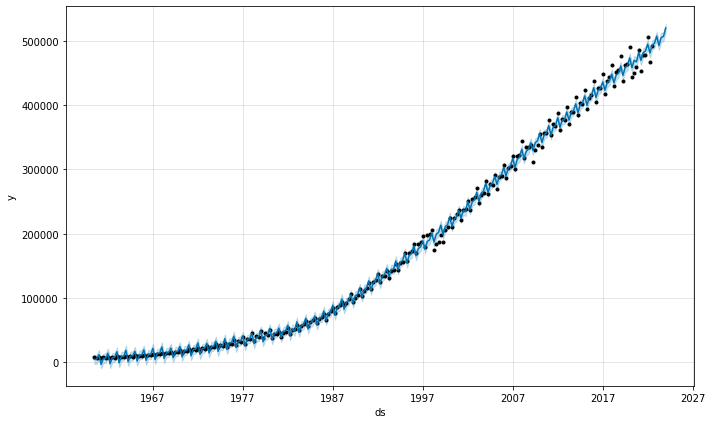

In [ ]:
# 시각화
m.plot(forecast);

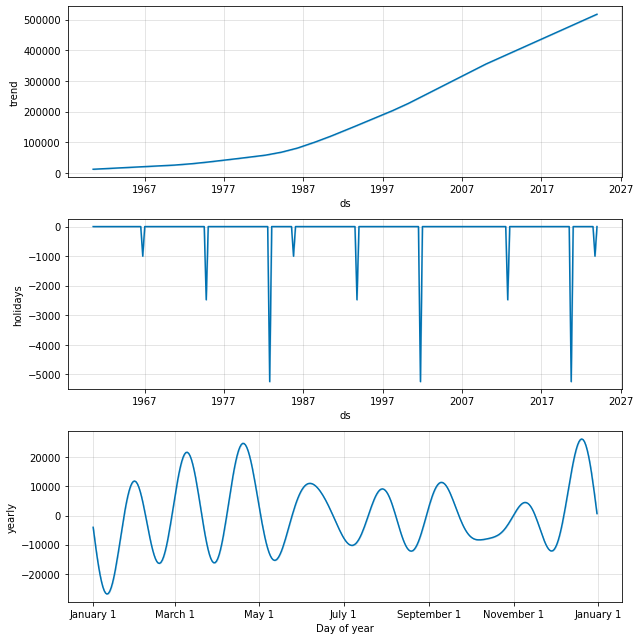

In [ ]:
m.plot_components(forecast);

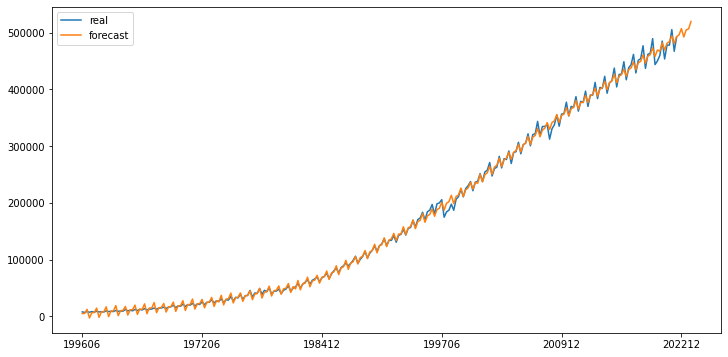

In [ ]:
# 실제와 예측 그래프 비교
plt.figure(figsize=(12,6))
plt.plot(df1['y'], label='real')
plt.plot(forecast['yhat'],label = 'forecast')
plt.legend()
plt.xticks([0,50,100,150,200,250],[199606,197206,198412,199706,200912,202212]);